In [16]:
import re, string, collections, pickle, os  #any object in Python can be pickled so that it can be saved on disk, Pickling is a way to convert a python object (list, dict, etc.) into a character stream
%matplotlib inline
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enabled_notebook()
import pandas as pd
import numpy as np
import itertools #module is a collection of tools for handling iterators
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.decomposition import TruncatedSVD, PCA #performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).Contrary to PCA,this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.
from sklearn.metrics import confusion_matrix

In [17]:
df = pd.read_csv("clean.csv",sep="|")
df.head()

,comment,sentiment
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great,1


In [18]:
# How many columns and rows
df.shape

(1000, 2)

In [19]:
# How many pos and neg sentence/comments in the clean.csv file
pos = df.loc[df["sentiment"]==1].copy().reset_index(drop=True)
neg = df.loc[df["sentiment"]==0].copy().reset_index(drop=True)
#neg.head()
#pos.head()
print(len(pos))
print(len(neg))

500
500


                                      Confusion Matrix

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df["comment"].values,df["sentiment"].values,test_size=0.2)
def tokenise(s):
    return s.split(" ")
vect = CountVectorizer(tokenizer = tokenise)
tf_train = vect.fit_transform(x_train)
tf_test = vect.transform(x_test)

Accuracy: 0.84


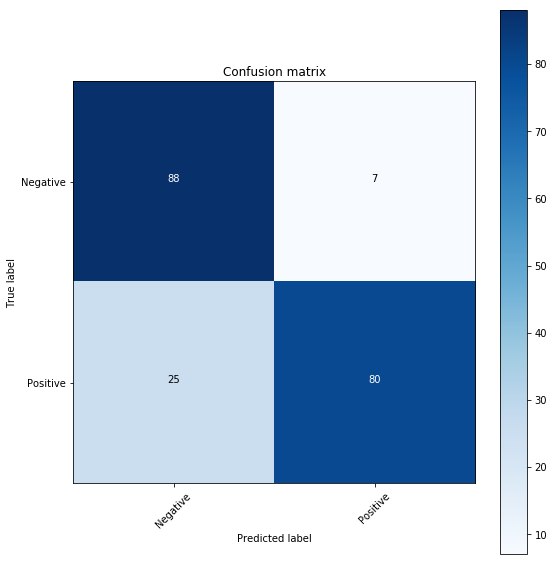

In [22]:
model = LogisticRegression(C=0.2, dual=True)
#model = MultinomialNB()
model.fit(tf_train, y_train)
preds = model.predict(tf_test)
acc = (preds==y_test).mean()
print(f'Accuracy: {acc}')
plot_confusion_matrix(confusion_matrix(y_test, preds.T), classes=['Negative', 'Positive'], title='Confusion matrix')
plt.show()

Confusion matrix describe the performance of a classification model (or "classifier") on a set of train data for which the true values are known

In [23]:
# Length of train data
len(pos), len(neg)

(500, 500)

In [24]:
df = pd.read_csv("C:\\Users\Microsoft\Desktop\DATA\data3.csv")
df.head()

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


In [25]:
#col = df["reviews.text"]
#col.head()

import re
f = open("C:\\Users\Microsoft\Desktop\DATA\data3.csv", encoding="utf8")
text = f.read()
f.close()
text = re.sub(r",+\n","\n",text)
text = re.sub(r",0\n","|0\n",text)
text = re.sub(r",1\n","|1\n",text)
text = re.sub(r"[.,\/#!$%\^&\*;:{}=\-_'~()\"]","",text)
#print(text)
f = open("clean1.csv","w", encoding="utf8")
f.write(text)
f.close()

In [26]:
import csv
df = pd.read_csv("clean1.csv", quoting=csv.QUOTE_NONE)
print(df.shape)

(34658, 1)


In [27]:
data = (df["reviewstext"].values)
tf_data = vect.transform(data)

In [28]:
preds = model.predict(tf_data)
preds[preds==0] = -1
preds

array([-1,  1, -1, ...,  1, -1, -1], dtype=int64)

In [29]:
main_data = pd.read_csv("data2.csv")
main_data["reviews.text"][9705]
main_data = main_data.drop([3211,9705],axis=0)

In [30]:
main_data["sentiments"] = preds
main_data.head()

,id,name,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.rating,reviews.text,reviews.title,reviews.username,sentiments
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,01/13/2017,True,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,-1
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,01/13/2017,True,5.0,great for beginner or experienced person. Boug...,very fast,truman,1
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,01/13/2017,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,-1
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,01/13/2017,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,01/12/2017,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1


In [31]:
post = main_data.loc[main_data["sentiments"]==1].copy().reset_index(drop=True)
negt = main_data.loc[main_data["sentiments"]==-1].copy().reset_index(drop=True)
#negt
#post
print(len(post))
print(len(negt))

25413
9245


In [34]:
# Both negative and positive sentiments
required_data = main_data[["name","sentiments"]]
required_data.head()

,name,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",-1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",-1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1


In [35]:
# Positive Sentiments
post[["reviews.text","sentiments"]].head()

,reviews.text,sentiments
0,great for beginner or experienced person. Boug...,1
1,I've had my Fire HD 8 two weeks now and I love...,1
2,I bought this for my grand daughter when she c...,1
3,This amazon fire 8 inch tablet is the perfect ...,1
4,"Great for e-reading on the go, nice and light ...",1


In [36]:
# Negative Sentiments 
negt[["reviews.text","sentiments"]].head()

,reviews.text,sentiments
0,This product so far has not disappointed. My c...,-1
1,Inexpensive tablet for him to use and learn on...,-1
2,Not easy for elderly users cease of ads that p...,-1
3,I really like this tablet. I would have given ...,-1
4,I was surprised when I learned of the capabili...,-1


In [39]:
# grouping the data as groupbyname
groups = required_data.groupby("name")
final = pd.DataFrame()
for name,group in groups:
    row = {}
    row["name"] =  name
    row["sentiment"] =  group["sentiments"].sum()
    final = final.append(row,ignore_index=True)
final.to_csv("sentiments_final.csv")
final.head()

,name,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1448.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",52.0
2,"All-New Kindle E-reader - Black, 6 Glare-Free ...",32.0
3,Amazon - Amazon Tap Portable Bluetooth and Wi-...,138.0
4,"Amazon - Fire 16GB (5th Gen, 2015 Release) - B...",1.0


In [21]:
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib import pyplot as plt
#plt.figure(figsize=(10,6))

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

Plot a graph of Number of Amazon products & its Sentiments

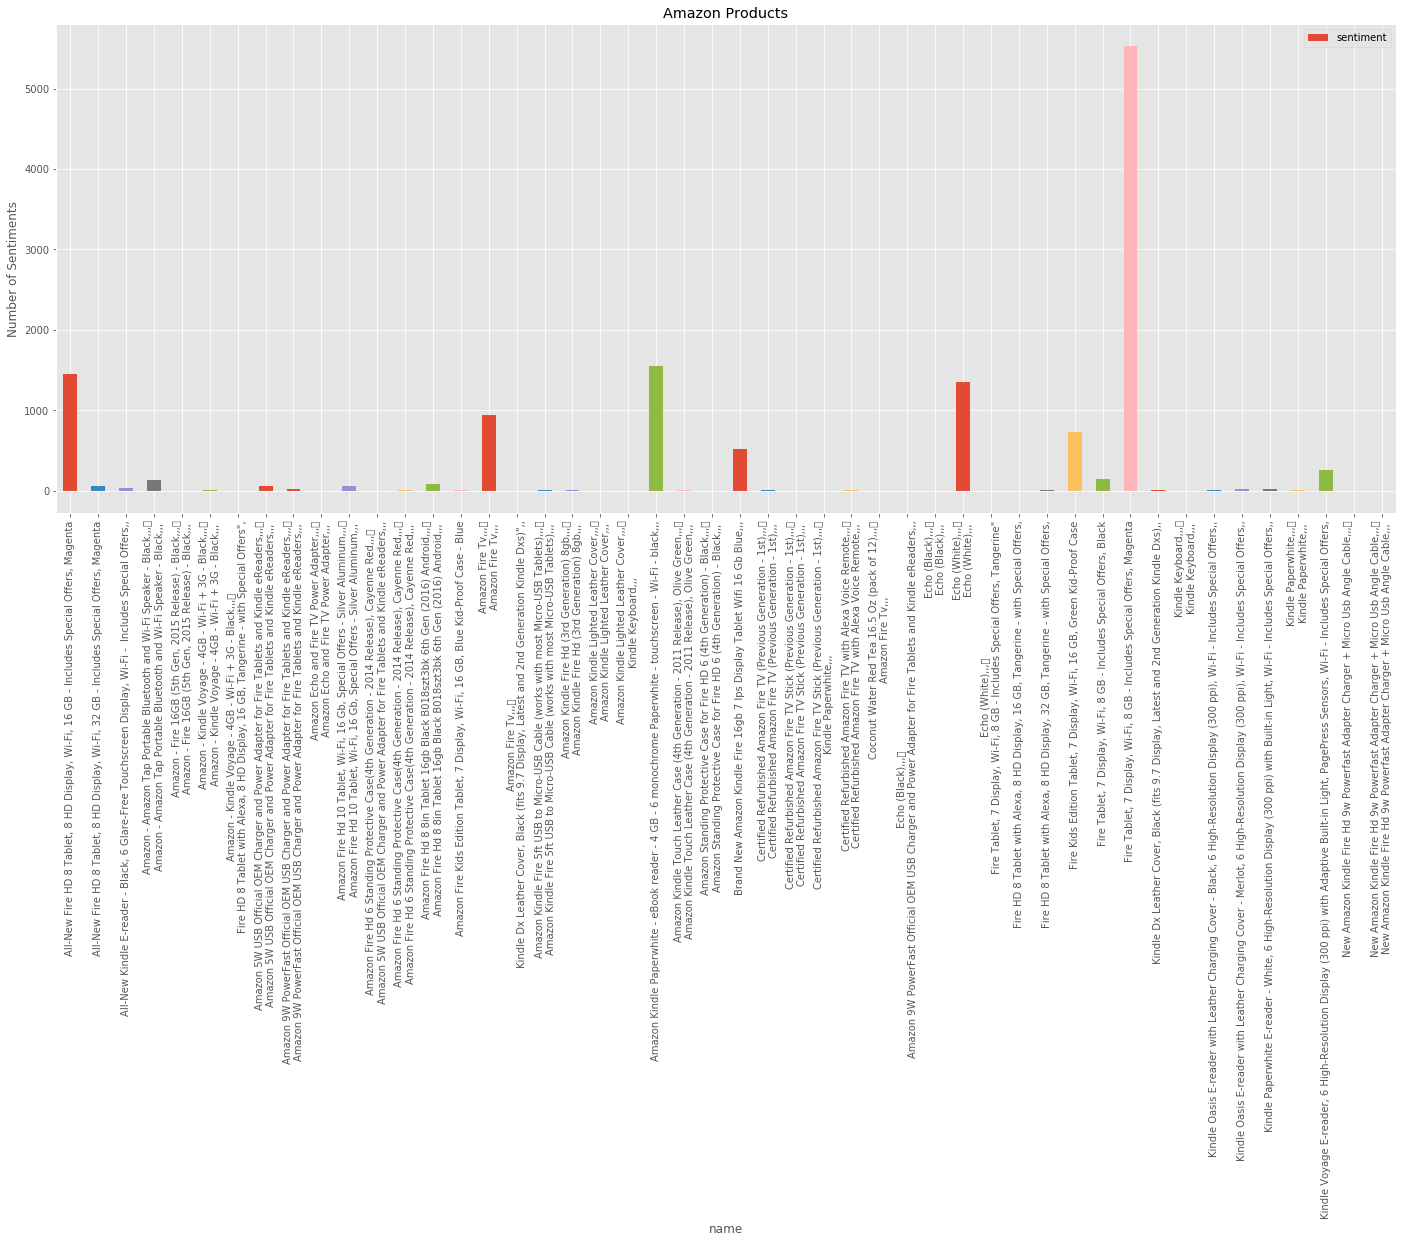

In [40]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(14,6))
sample = final.loc[0:48]
sample.plot.bar(x="name",y="sentiment", figsize=(24, 9))
plt.ylabel("Number of Sentiments")
plt.title('Amazon Products')
plt.legend()
#plt.plot(x)
plt.show()

Plot a graph as different numbers of Amazon products from 1 to 5

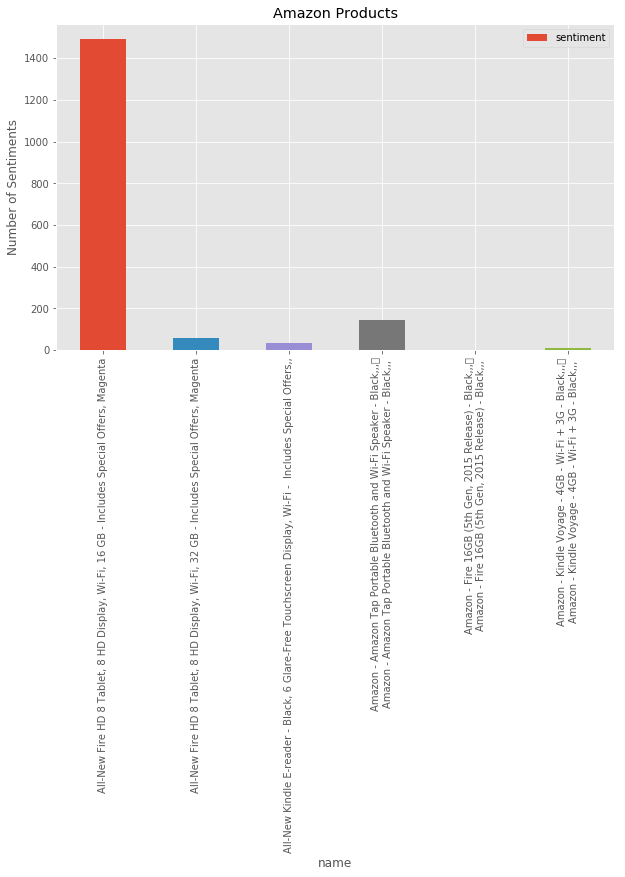

In [43]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize = (15,6))
sample = final.loc[0:5]
sample.plot.bar(x="name",y="sentiment", figsize=(10, 6))
plt.ylabel("Number of Sentiments")
plt.title('Amazon Products')
plt.legend()
plt.show()

Plot a graph as different numbers of Amazon products from 6 to 12

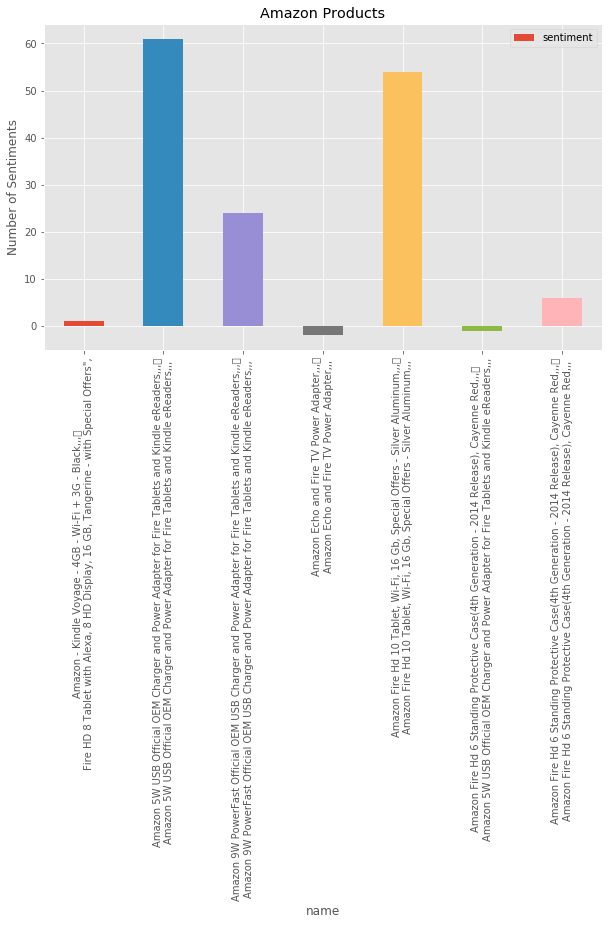

In [44]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize = (15,6))
sample = final.loc[6:12]
sample.plot.bar(x="name",y="sentiment", figsize=(10, 6))
plt.ylabel("Number of Sentiments")
plt.title('Amazon Products')
plt.legend()
plt.show()

Plot a graph as different numbers of Amazon products from 13 to 18

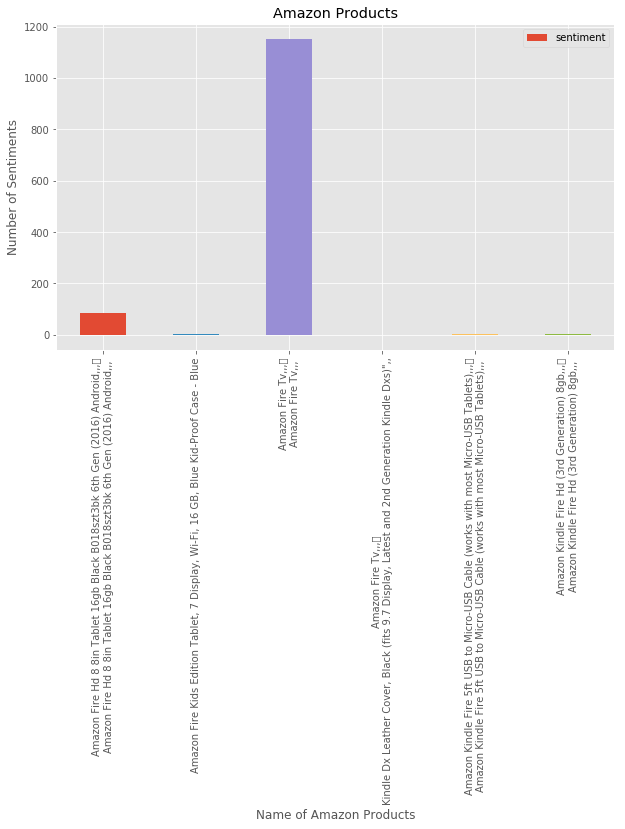

In [45]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize = (15,6))
sample = final.loc[13:18]
sample.plot.bar(x="name",y="sentiment", figsize=(10, 6))
plt.ylabel("Number of Sentiments")
plt.xlabel("Name of Amazon Products")
plt.title('Amazon Products')
plt.legend()
plt.show()

Plot a graph as different numbers of Amazon products from 19 to 25

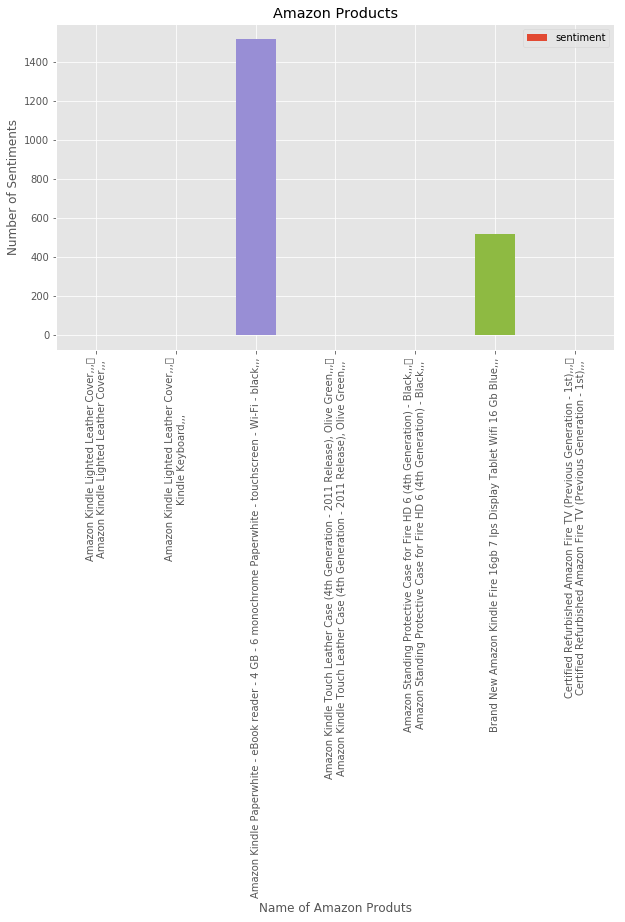

In [46]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize = (15,6))
sample = final.loc[19:25]
sample.plot.bar(x="name",y="sentiment", figsize=(10, 6))
plt.ylabel("Number of Sentiments")
plt.xlabel("Name of Amazon Produts")
plt.title('Amazon Products')
plt.legend()
plt.show()

Plot a graph as different numbers of Amazon products from 0 to 25

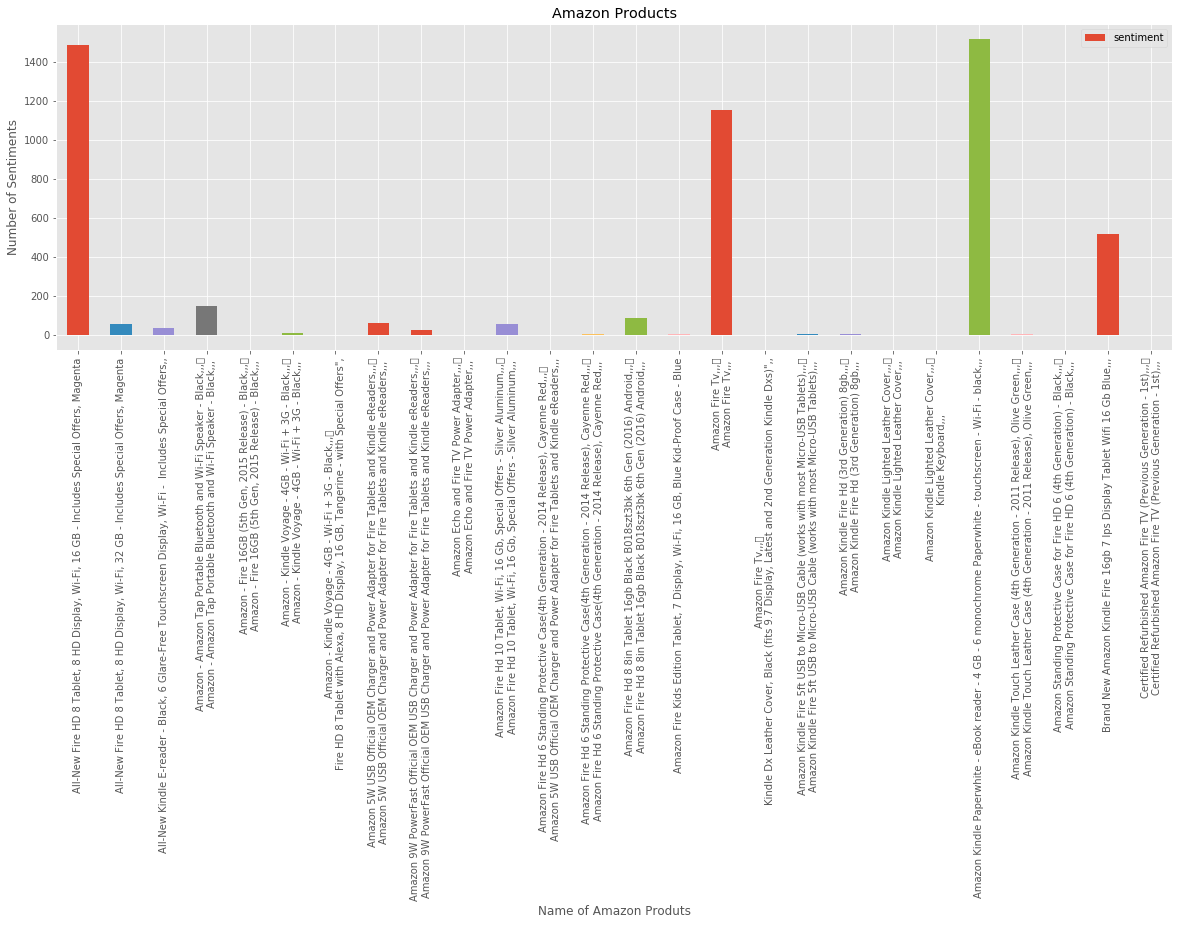

In [47]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize = (15,6))
sample = final.loc[0:25]
sample.plot.bar(x="name",y="sentiment", figsize=(20, 6))
plt.ylabel("Number of Sentiments")
plt.xlabel("Name of Amazon Produts")
plt.title('Amazon Products')
plt.legend()
plt.show()

Plot a graph as different numbers of Amazon products from 0 to 30

In [49]:
sent = pd.read_csv("sentiments_final.csv")
sent.head()

,Unnamed: 0,name,sentiment
0,0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1490.0
1,1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",58.0
2,2,"All-New Kindle E-reader - Black, 6 Glare-Free ...",34.0
3,3,Amazon - Amazon Tap Portable Bluetooth and Wi-...,146.0
4,4,"Amazon - Fire 16GB (5th Gen, 2015 Release) - B...",1.0


In [62]:
df = pd.read_csv("C:\\Users\Microsoft\Desktop\DATA\data2.csv")
df.head()

,id,name,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,True,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,True,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


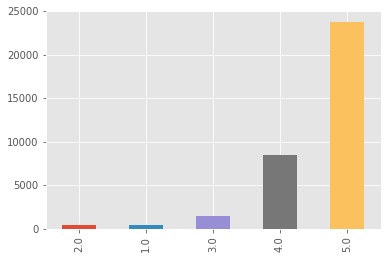

In [51]:
#ploting graph on the basis of review ratings
df["reviews.rating"].value_counts().sort_values().plot.bar()
plt.show()

Above reviews shows maximum reviews are positive

In [57]:
vocab = vect.get_feature_names()
len(vocab)

1657

In [58]:
coef_df = pd.DataFrame({'vocab': vocab, 'coef':model.coef_.reshape(-1)})
pos_top10 = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:10]
neg_top10 = coef_df.sort_values('coef').reset_index(drop=True)[:10]

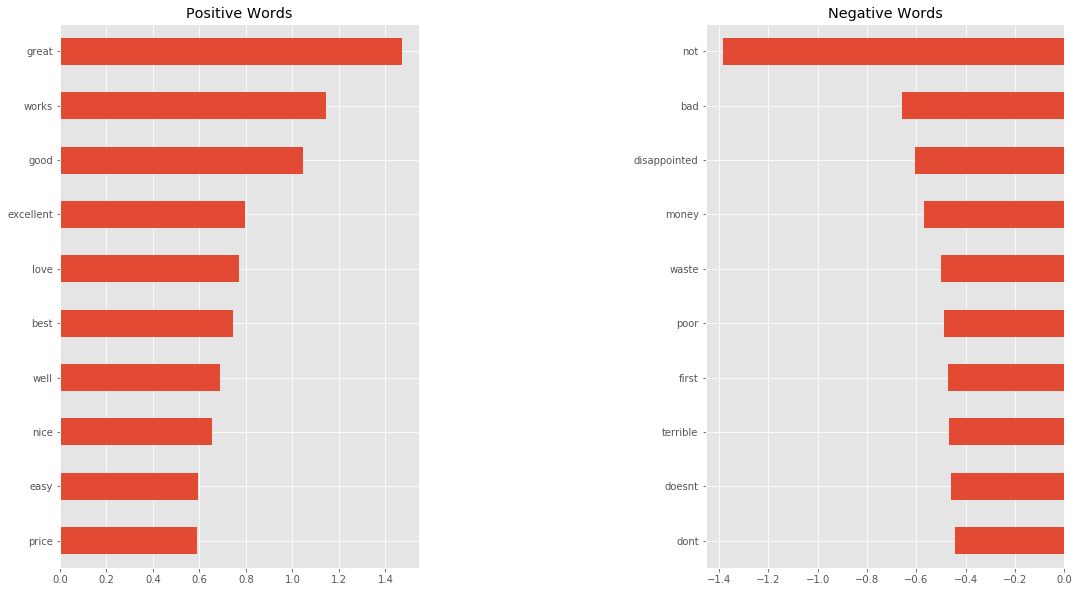

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.subplots_adjust(wspace=0.8)
pos_top10.sort_values('coef').plot.barh(legend=False, ax=axs[0])
axs[0].set_yticklabels(pos_top10['vocab'].values.tolist()[::-1])
axs[0].set_title('Positive Words');
neg_top10.sort_values('coef', ascending=False).plot.barh(legend=False, ax=axs[1])
axs[1].set_yticklabels(neg_top10['vocab'].values.tolist()[::-1])
axs[1].set_title('Negative Words');

In [63]:
#Filtering not null values
perm = df[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
senti= perm[perm["reviews.rating"].notnull()]
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [64]:
#Classifying text as postive and negative¶
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                              WORDS CLOUD

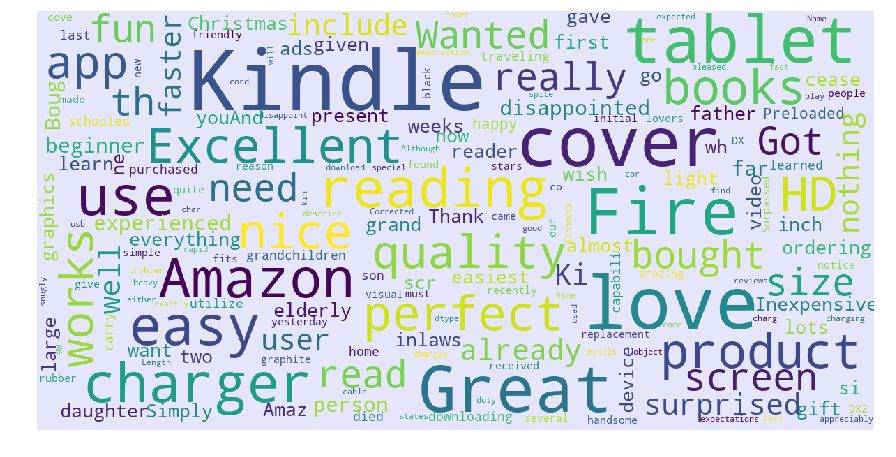

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='lavender',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["reviews.text"])

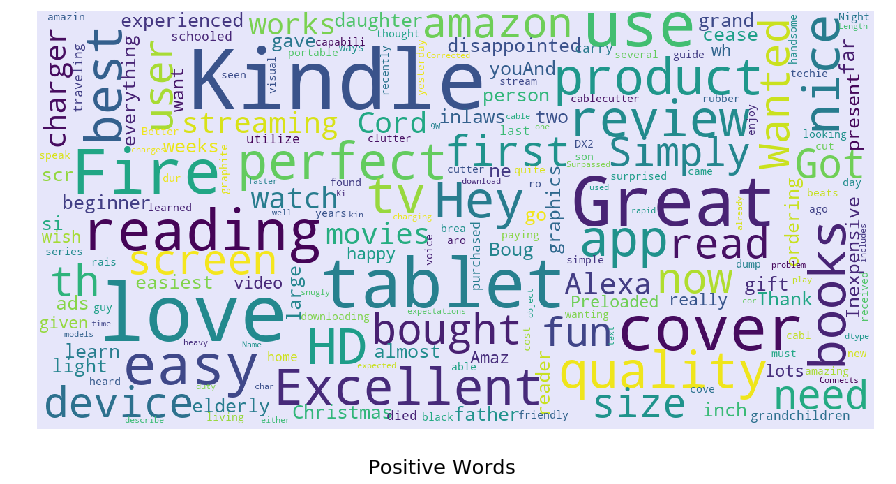

In [66]:
show_wordcloud(senti["reviews.text"][senti.senti == "pos"] , title="Positive Words")

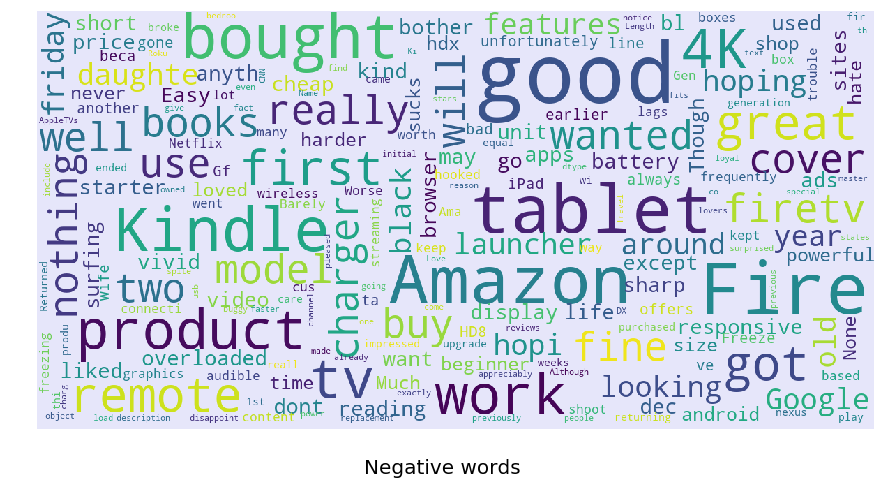

In [67]:
show_wordcloud(senti["reviews.text"][senti.senti == "neg"] , title="Negative words")